In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score 
from sklearn.metrics import confusion_matrix
import nltk
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels



In [3]:


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")


Train confusion matrix


In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
df=pd.read_excel(R"C:\Users\user\Downloads\sepm_ig.xlsx")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_url          500 non-null    object 
 1   num_comments      500 non-null    int64  
 2   num_likes         500 non-null    int64  
 3   caption           500 non-null    object 
 4   image_url         500 non-null    object 
 5   is_video          500 non-null    bool   
 6   likes_scaled      500 non-null    float64
 7   comments_scaled   500 non-null    float64
 8   engagement_score  500 non-null    float64
 9   engagement_high   500 non-null    int64  
dtypes: bool(1), float64(3), int64(3), object(3)
memory usage: 35.8+ KB


In [7]:
df.head(10)

,post_url,num_comments,num_likes,caption,image_url,is_video,likes_scaled,comments_scaled,engagement_score,engagement_high
0,https://www.instagram.com/p/Cm6lUH1BrVp/,155,23548,Image by @deepakumar_photography \n\nWhatcha l...,https://instagram.fidr4-2.fna.fbcdn.net/v/t51....,False,0.011827,0.024588,0.019483,0
1,https://www.instagram.com/p/Cm4mf5PgVNz/,98,21397,How are the animals at @georgiaaquarium celebr...,https://instagram.fidr4-3.fna.fbcdn.net/v/t51....,True,0.010747,0.015546,0.013626,0
2,https://www.instagram.com/p/Cm4AiByvFGF/,230,67377,Sun rises on a fresh start. \n\nTell us what p...,https://instagram.fidr4-2.fna.fbcdn.net/v/t51....,False,0.033840,0.036485,0.035427,1
3,https://www.instagram.com/p/Cm3XWnEp5Gd/,193,44645,#HappyNewYear! 🎆\n\nHow are you celebrating? ✨,https://instagram.fidr4-3.fna.fbcdn.net/v/t51....,True,0.022423,0.030615,0.027338,1
4,https://www.instagram.com/p/Cm2uIPLPM2m/,119,31637,Night falls and a #NewYear is nearby...\n\nWhe...,https://instagram.fidr4-3.fna.fbcdn.net/v/t51....,False,0.015890,0.018877,0.017682,0
5,https://www.instagram.com/p/Cmy24_TvoTC/,106,21364,Image by Paul Souders\n\nComing through!\n\nTh...,https://instagram.fidr4-2.fna.fbcdn.net/v/t51....,False,0.010730,0.016815,0.014381,0
6,https://www.instagram.com/p/CmwmwOhvcwz/,180,47205,Video by @ryansouthwell \n\nA #RestStop to tak...,https://instagram.fidr4-3.fna.fbcdn.net/v/t51....,True,0.023709,0.028553,0.026615,1
7,https://www.instagram.com/p/CmwSHGmvtUX/,153,37875,Image by Andrew Peacock\n\nOut of your three c...,https://instagram.fidr4-1.fna.fbcdn.net/v/t51....,False,0.019023,0.024270,0.022171,0
8,https://www.instagram.com/p/CmttaIChVtT/,283,76688,It's me. Hi. I'm the cutest. It's me. 🐾\n\nAn ...,https://instagram.fidr4-2.fna.fbcdn.net/v/t51....,False,0.038517,0.044892,0.042342,1
9,https://www.instagram.com/p/Cmrxz71B5O4/,85,20728,There are two types of people: people who enjo...,https://instagram.fidr4-1.fna.fbcdn.net/v/t51....,False,0.010411,0.013484,0.012254,0


In [8]:
df['engagement_high'].value_counts() #baseline acc = 50%

0    250
1    250
Name: engagement_high, dtype: int64

In [9]:
#turn from list to string
df['cap_words'] = df['caption'].astype(str)

In [10]:
def remove_punctuation(comment):
    for term in punctuation:
        comment = comment.replace(term,'')
    return comment

df['cap_words'] = df['cap_words'].apply(remove_punctuation)

In [11]:
df.head()

,post_url,num_comments,num_likes,caption,image_url,is_video,likes_scaled,comments_scaled,engagement_score,engagement_high,cap_words
0,https://www.instagram.com/p/Cm6lUH1BrVp/,155,23548,Image by @deepakumar_photography \n\nWhatcha l...,https://instagram.fidr4-2.fna.fbcdn.net/v/t51....,False,0.011827,0.024588,0.019483,0,Image by deepakumarphotography \n\nWhatcha loo...
1,https://www.instagram.com/p/Cm4mf5PgVNz/,98,21397,How are the animals at @georgiaaquarium celebr...,https://instagram.fidr4-3.fna.fbcdn.net/v/t51....,True,0.010747,0.015546,0.013626,0,How are the animals at georgiaaquarium celebra...
2,https://www.instagram.com/p/Cm4AiByvFGF/,230,67377,Sun rises on a fresh start. \n\nTell us what p...,https://instagram.fidr4-2.fna.fbcdn.net/v/t51....,False,0.033840,0.036485,0.035427,1,Sun rises on a fresh start \n\nTell us what pl...
3,https://www.instagram.com/p/Cm3XWnEp5Gd/,193,44645,#HappyNewYear! 🎆\n\nHow are you celebrating? ✨,https://instagram.fidr4-3.fna.fbcdn.net/v/t51....,True,0.022423,0.030615,0.027338,1,HappyNewYear 🎆\n\nHow are you celebrating ✨
4,https://www.instagram.com/p/Cm2uIPLPM2m/,119,31637,Night falls and a #NewYear is nearby...\n\nWhe...,https://instagram.fidr4-3.fna.fbcdn.net/v/t51....,False,0.015890,0.018877,0.017682,0,Night falls and a NewYear is nearby\n\nWhere a...


In [12]:
#tfidf vectorizer
corpus = df['cap_words'].tolist() 
vectorizer = TfidfVectorizer(stop_words='english',max_features=2000)
X = vectorizer.fit_transform(corpus)

In [13]:
X

<500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 7703 stored elements in Compressed Sparse Row format>

In [14]:
#Captions test & train
X_cap = X
y = df['engagement_high']

In [15]:
y

0      0
1      0
2      1
3      1
4      0
      ..
495    0
496    0
497    1
498    1
499    1
Name: engagement_high, Length: 500, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_cap, y, test_size=0.2, random_state=0)

Accuracy Score: 0.71
ROC_AUC Score: 0.7773752012882448
F1 Score: 0.7128712871287127
Confusion Matrix:
Confusion matrix, without normalization


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

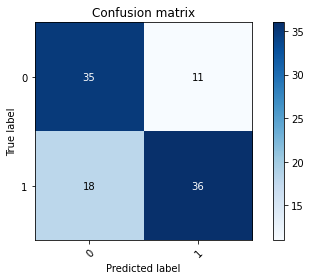

In [17]:
#Log. Reg captions only
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('ROC_AUC Score:',roc_auc_score(y_test,y_pred_score))
print('F1 Score:',f1_score(y_test,y_pred))
print('Confusion Matrix:')

plot_confusion_matrix(y_true = y_test, 
                      y_pred = y_pred, classes = np.unique(y_test),
                     title = 'Confusion matrix')

In [18]:
#Random forest for captions only 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [19]:
#Captions test & train
X_cap = X
y = df['engagement_high']

In [20]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


In [21]:


# Create the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=7)


In [22]:

# Train the classifier on the training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=7)

In [23]:

# Print the accuracy of the model on the test data
print(clf.score(X_test, y_test))


0.68


In [24]:
# svm for captions only
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [25]:

# determining values
X_cap = X
y = df['engagement_high']


In [26]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [27]:

# Create the SVM classifier
clf = SVC(kernel='linear', random_state=7)

In [28]:


# Train the classifier on the training data
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=7)

In [29]:


# Print the accuracy of the model on the test data
print(clf.score(X_test, y_test))

0.656
